In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
df = pd.read_csv("OnlineRetail.csv", encoding = "ISO-8859-1")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [66]:
df.describe()

,Year,Month,Quantity,UnitPrice,CustomerID
count,13.000000,13.000000,13.000000,13.000000,1.300000e+01
mean,2010.923077,6.923077,27834.769231,43601.270769,2.601095e+07
std,0.277350,3.774068,16724.675409,17758.371067,8.372202e+06
min,2010.000000,1.000000,-8049.000000,20091.050000,1.399278e+07
25%,2011.000000,4.000000,24368.000000,34441.220000,2.112483e+07
50%,2011.000000,7.000000,27580.000000,35683.390000,2.454990e+07
75%,2011.000000,10.000000,33197.000000,56882.050000,2.811232e+07
max,2011.000000,12.000000,67237.000000,78930.360000,4.699130e+07


In [67]:
df.head()


,Year,Month,Quantity,UnitPrice,CustomerID
0,2010,12,27534,78930.36,26343589.0
1,2011,1,27580,46325.07,18628875.0
2,2011,2,34787,22989.03,18291340.0
3,2011,3,11240,35664.99,24549896.0
4,2011,4,24368,20091.05,21124829.0


In [34]:
df= df.drop_duplicates(subset='InvoiceNo', keep='first')

1. Vẽ biểu đồ đường thể hiện xu hướng thay đổi luwojng đơn hàng theo thời gian trong năm 2011

In [21]:
df['Year'] = pd.DatetimeIndex(df['InvoiceDate']).year
df['Month'] = pd.DatetimeIndex(df['InvoiceDate']).month
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,2010,12
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,2010,12


In [59]:
df1 = df.groupby(['Year','Month']).sum().reset_index()
type(df1)

pandas.core.frame.DataFrame

In [62]:
df2 = df1[df1['Year']==2011]
df2

,Year,Month,Quantity,UnitPrice,CustomerID
1,2011,1,27580,46325.07,18628875.0
2,2011,2,34787,22989.03,18291340.0
3,2011,3,11240,35664.99,24549896.0
4,2011,4,24368,20091.05,21124829.0
5,2011,5,35573,56882.05,28112320.0
6,2011,6,-8049,69800.72,26126823.0
7,2011,7,33197,44489.15,24338528.0
8,2011,8,29844,28849.26,23539436.0
9,2011,9,32983,35683.39,31665704.0
10,2011,10,25038,57412.71,34436869.0


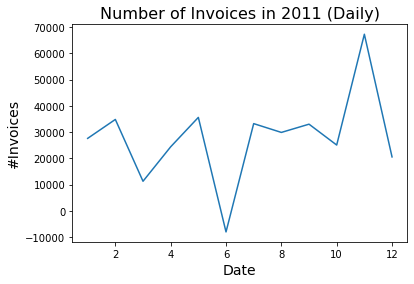

In [64]:
plt.plot(df2['Month'],df2['Quantity'])

plt.title('Number of Invoices in 2011 (Daily)', fontsize = 16)

plt.xlabel('Date', fontsize = 14)
plt.ylabel('#Invoices', fontsize = 14)
plt.show()


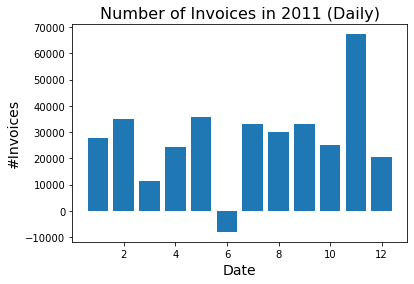

In [65]:
plt.bar(df2['Month'],df2['Quantity'])

plt.title('Number of Invoices in 2011 (Daily)', fontsize = 16)

plt.xlabel('Date', fontsize = 14)
plt.ylabel('#Invoices', fontsize = 14)
plt.show()
